In [4]:
from PIL import Image

# Assignment 6: Cat and Dog recognition

In this assignment you will build a convolutional neural network (CNN) that is able to tell whether an image shows a cat or a dog. Furthermore, since we don’t have that many data to train our mode with, we will train another model that uses as a base the existing CNN model VGG16 that has frequently shown a very good performance in classifying images in datasets with hundreds or even thousands of possible classes. Lastly, you will evaluate the performance of the model and classify your own pet images. 

## Exercise 06.1: Training the CNN

What we want to do first is load all the images into arrays in RAM. The final goal should be a training set numpy array with a shape (23000,64, 64, 3) and a test set numpy array with a shape (2000, 64, 64, 3) containing all the images, where 23000 and 2000 are the total number of cat and dog images, 64x64 is the pixel size of each image and 3 is the number of color channels. You might not end up with a total of 25000 images because some images are corrupted. In any case, the test set should have 1000 cat images and 1000 dog images and the rest goes into the training set. Prepare these arrays, by resizing all of the images to 64x64 pixels and converting them into numpy arrays containing the RGB values of each pixel (convert the grey scale images accordingly). For this you might want to install and use the pillow library together with its Image functionalities such as resize and convert. Additionally, create two arrays with shapes (23000, 1) and (2000, 1) containing the corresponding labels (1 if the image shows a cat and 0 if it shows a dog).

Finally, normalize the RGB values that go from 0 to 255 to values between 0 and 1. Loading and preparing the arrays might take some time (if you want to monitor the progress, you can add progress bars with the tqdm library)!

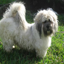

In [30]:
im = Image.open("/Users/jercheal/Documents/Physics/CPIV_ML/PetImages/Dog/11000.jpg").resize((64, 64))
im.convert("RGB")